In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder



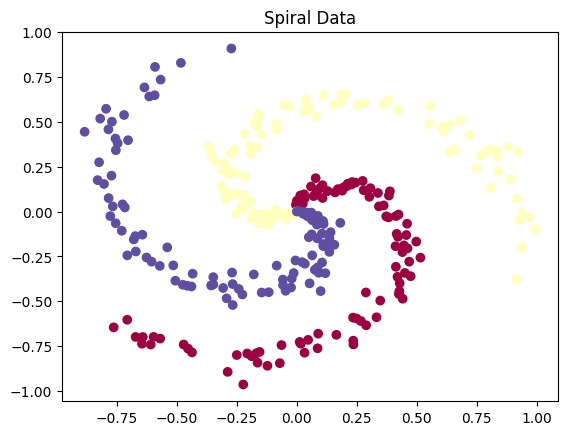

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def generate_spiral_data(points, classes):
    X = np.zeros((points * classes, 2)) 
    y = np.zeros(points * classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points * class_number, points * (class_number + 1))
        r = np.linspace(0.0, 1, points)
        t = np.linspace(class_number * 4, (class_number + 1) * 4, points) + np.random.randn(points) * 0.2  # Theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = class_number
    return X, y

#generating spiral dataset with 3 classes and 100 points per class
X, y = generate_spiral_data(100, 3)

#plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("Spiral Data")
plt.show()


In [8]:
from sklearn.preprocessing import OneHotEncoder

#one-hot encoding
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

print("Labels after One-Hot Encoding:")
print(y_onehot[:5])

Labels after One-Hot Encoding:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


c:\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [11]:
#drfine the model
model = Sequential([
    Dense(5, input_shape=(2,), activation='relu'),
    Dense(3, activation='softmax')
])

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#compiling
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#training 
history = model.fit(X, y_onehot, epochs=1000, batch_size=32, validation_split=0.25, verbose=0)

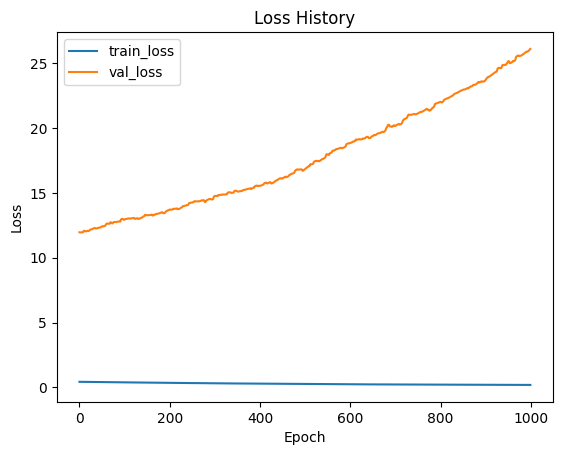

4705/4705 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


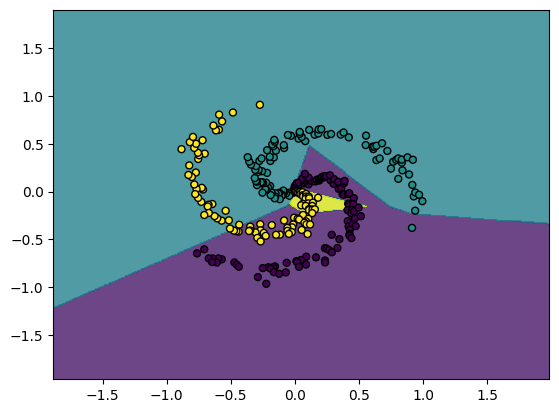

In [17]:
#plotting the training & validation losses
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plotting decision boundaries
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = np.argmax(model.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=25)
    plt.show()

plot_decision_boundary(model, X, y)


Training with 1 neurons in the hidden layer...
Training with 3 neurons in the hidden layer...
Training with 7 neurons in the hidden layer...
Training with 16 neurons in the hidden layer...
Training with 32 neurons in the hidden layer...


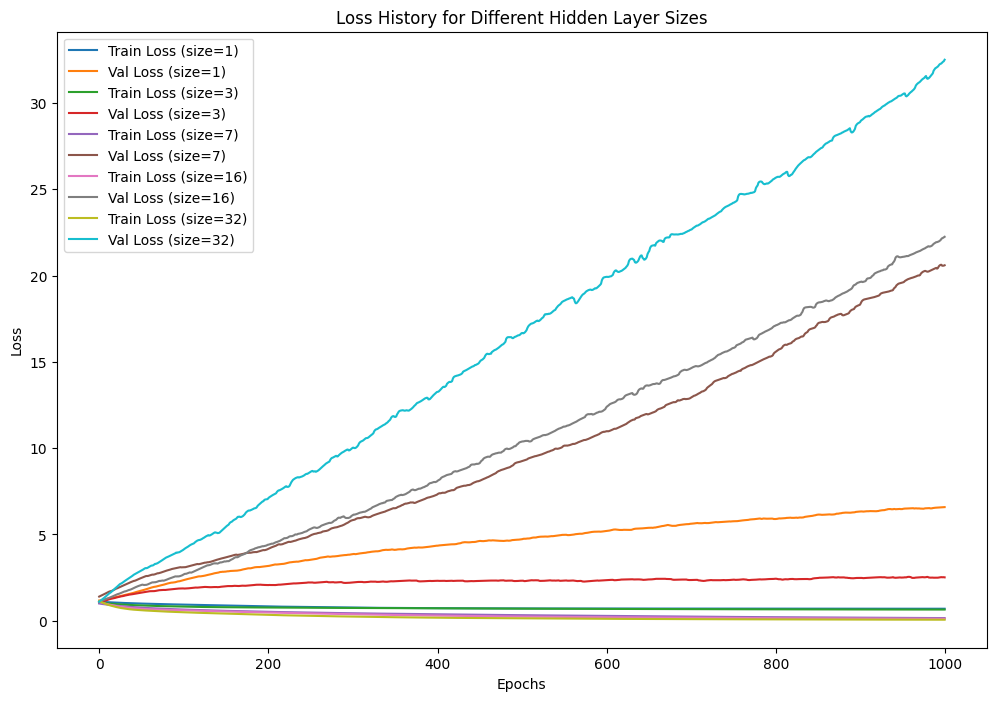

In [19]:
# Function to build and train a neural network with a given hidden layer size
def train_model(hidden_layer_size, X, y_onehot, epochs=10000, batch_size=32):
    model = Sequential([
        Dense(hidden_layer_size, input_shape=(2,), activation='relu'),
        Dense(3, activation='softmax')  
    ])
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    #train the model
    history = model.fit(X, y_onehot, epochs=epochs, batch_size=batch_size, validation_split=0.25, verbose=0)
    
    return model, history

#varying hidden layer sizes: 1, 3, 7, 16, and 32 neurons
hidden_sizes = [1, 3, 7, 16, 32]
histories = []

for size in hidden_sizes:
    print(f"Training with {size} neurons in the hidden layer...")
    model, history = train_model(size, X, y_onehot, epochs=1000)
    histories.append((size, history))

#plotting loss history for each model
plt.figure(figsize=(12, 8))
for size, history in histories:
    plt.plot(history.history['loss'], label=f'Train Loss (size={size})')
    plt.plot(history.history['val_loss'], label=f'Val Loss (size={size})')

plt.title('Loss History for Different Hidden Layer Sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()